In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("D:\Capstone\Databases\ML CSV\CUDB\Refined\TCSC_MEA_STE_MAV_shannon_sample_power_energy\TCSC_MEA_STE_MAV_shannon_sample_power_energy_github.csv")

In [ ]:
# Separate the data into two classes
class_0 = df[df["rhythm"] == 0]
class_1 = df[df["rhythm"] == 1]

# Undersample class 0 to match the number of samples in class 1
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

# Concatenate the undersampled class 0 with class 1
balanced_df = pd.concat([class_0_undersampled, class_1])

# Shuffle the concatenated DataFrame to mix the rows
#balanced_df = balanced_df.sample(frac=1, random_state=100)

In [ ]:
print(balanced_df['rhythm'].value_counts())

rhythm
0    749
1    749
Name: count, dtype: int64


In [ ]:
#X = balanced_df.drop(columns=['TCSC', 'energy', 'rhythm'])
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [ ]:
X_test.shape, X_train.shape, y_test.shape , y_train.shape

((300, 8), (1198, 8), (300,), (1198,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf.feature_importances_

array([0.10542823, 0.10858323, 0.129186  , 0.14293953, 0.12877142,
       0.14368128, 0.12407202, 0.1173383 ])

In [ ]:
X_train.columns

Index(['TCSC', 'MAV', 'STE', 'MEA', 'shannon_ent', 'sample_ent', 'b_power_git',
       'energy_git'],
      dtype='object')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[132,  26],
       [ 10, 132]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.88

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       142
           1       0.93      0.84      0.88       158

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



In [ ]:
'''from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train, cv = 10)'''

'from sklearn.model_selection import cross_val_score\ncross_val_score(clf, X_train, y_train, cv = 10)'

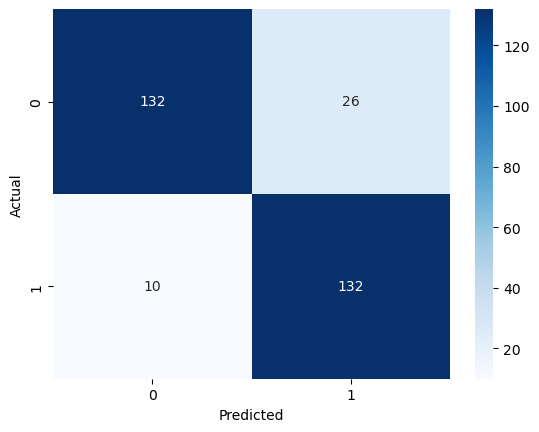

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


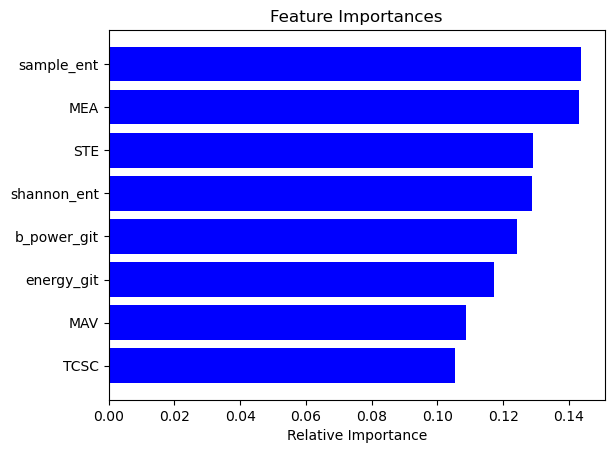

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
